In [1]:
import pandas as pd
df = pd.read_csv("c:/data/heart/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [3]:
train_cols = df.columns[0:13]
X = df[train_cols] # 독립변수
y = df["target"]
print(type(X), type(y))
print(X.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['target'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["target"].value_counts()

0    138
1    138
Name: target, dtype: int64

In [5]:
X = df_samp[train_cols] # 독립변수
y = df_samp["target"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model1 = DecisionTreeClassifier(random_state=0)
model2 = RandomForestClassifier(n_estimators=100, random_state=0)
for model in (model1, model2):
    print(model)
    model.fit(X_train,y_train)
    print("학습용:",model.score(X_train, y_train))
    print("검증용:",model.score(X_test, y_test))
    print()
#랜덤포레스트의 변종으로 익스트림 랜덤 트리(Extemely Randomized Trees)
# 또는 엑스트라 트리(Extra Trees) 모형
# 랜덤포레스트를 개량한 모형

DecisionTreeClassifier(random_state=0)
학습용: 1.0
검증용: 0.6071428571428571

RandomForestClassifier(random_state=0)
학습용: 1.0
검증용: 0.75



In [9]:
from sklearn.ensemble import ExtraTreesClassifier
model3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
for model in (model1, model2, model3):
    print(model)
    model.fit(X_train,y_train)
    print("학습용:",model.score(X_train, y_train))
    print("검증용:",model.score(X_test, y_test))
    print()
# DecisionTree < RandomForest < ExtraTree 순으로 성능이 개선 됨

DecisionTreeClassifier(random_state=0)
학습용: 1.0
검증용: 0.6071428571428571

RandomForestClassifier(random_state=0)
학습용: 1.0
검증용: 0.75

ExtraTreesClassifier(random_state=0)
학습용: 1.0
검증용: 0.8035714285714286



In [10]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스예측)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("importances")
    plt.ylabel("variables")
    plt.ylim(-1, n_features)

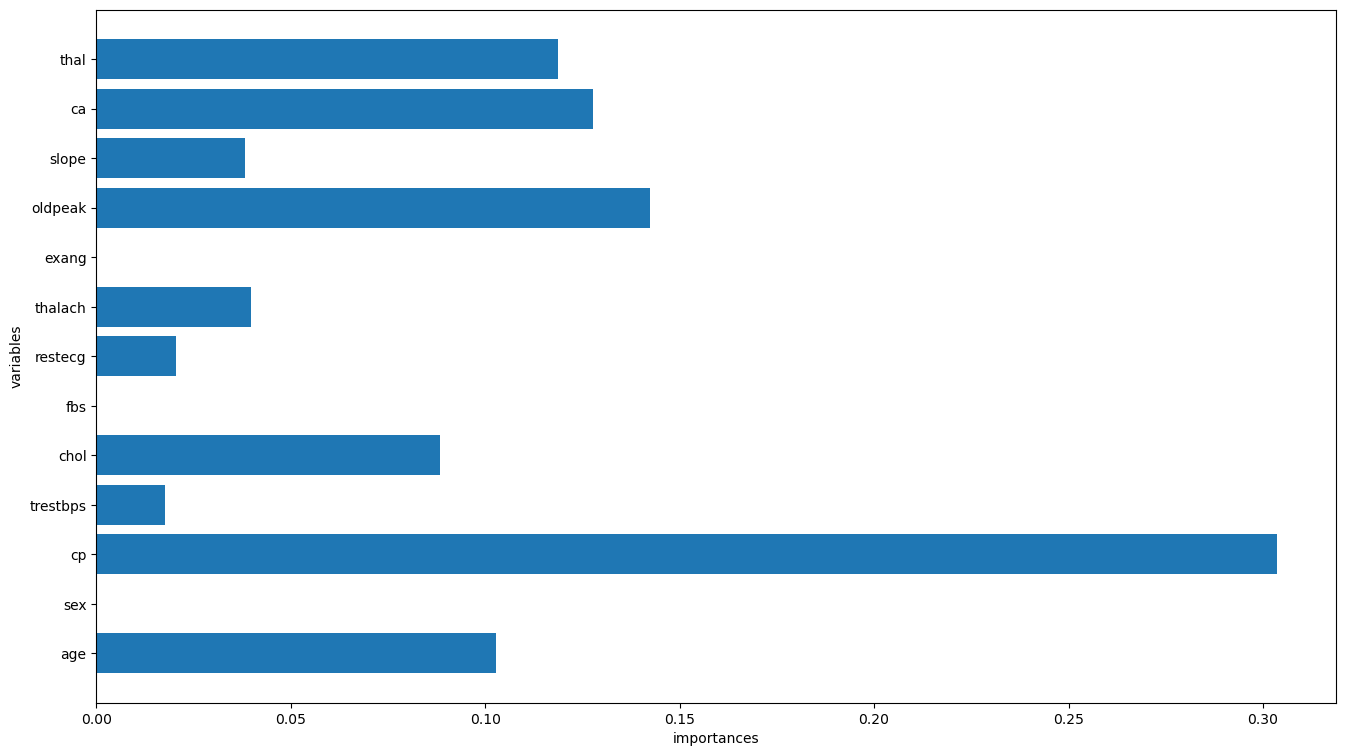

In [11]:
plot_tree(model1)

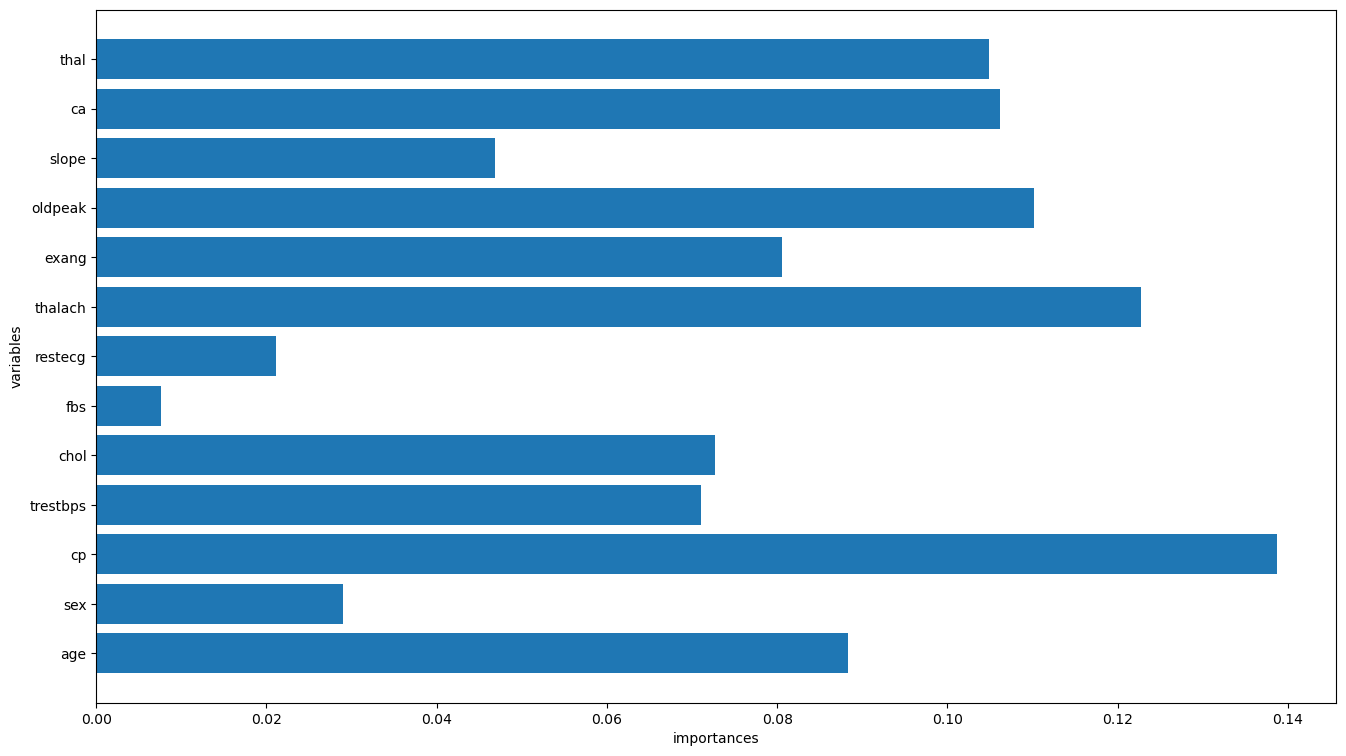

In [12]:
plot_tree(model2)

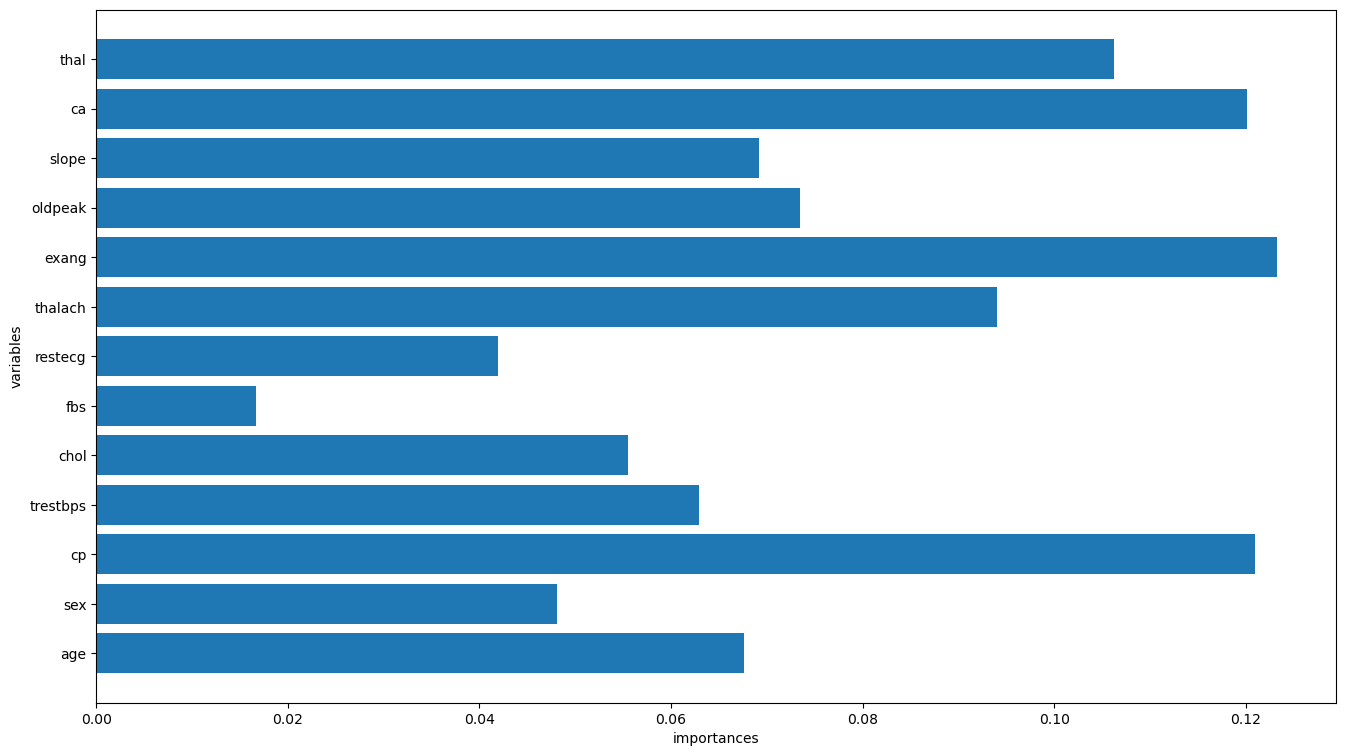

In [13]:
plot_tree(model3)